# 探索神经网络过拟合问题

In [1]:
import json
import sys
import random

from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

import improved_network as network
import visualization as visual
sys.path.append("../module/")
import mnist_loader

## 问题引入

这一节我们通过识别MNIST数据集来分析在训练过程中出现的过拟合现象。训练时，我们使用交叉熵代价函数，将隐藏层神经元设置为$30$，学习率$\alpha=0.5$，$\text{mini_bacth_size}=10$。但是我们不将所有的60000个图像数据都用来训练，而只取前1000个数据，同时设置$\text{Epoches}=200$。这样处理之后，会使得过拟合现象更为明显，便于我们观察。

In [4]:
# 数据导入
training_data, test_data = mnist_loader.load_data_wrapper(dirpath="../data/mnist/")

In [136]:
%%time
np.random.seed(42)
random.seed(42)
net = network.Network([784, 30, 10], cost = network.CrossEntropyCost)
training_cost, training_accuracy, evaluation_cost, evaluation_accuracy = \
net.SGD(training_data[:1000], 400, 10, 0.5,
        evaluation_data=test_data,
        monitor_evaluation_cost=True,
        monitor_evaluation_accuracy = True,
        monitor_training_cost=True,
        monitor_training_accuracy = True)

f = open("json/overfitting1.json", 'w')
json.dump([training_cost, training_accuracy, evaluation_cost, evaluation_accuracy], f)
f.close()

Epoch 0 training complete
Cost on training data: 1.989021140098863
Accuracy on training data: 0.617
Cost on evaluation data: 2.1433989783621485
Accuracy on evaluation data: 0.5605
Epoch 1 training complete
Cost on training data: 1.5245112186068437
Accuracy on training data: 0.726
Cost on evaluation data: 1.7725034023266806
Accuracy on evaluation data: 0.6527
Epoch 2 training complete
Cost on training data: 1.2173953208772508
Accuracy on training data: 0.831
Cost on evaluation data: 1.5169019267345993
Accuracy on evaluation data: 0.7297
Epoch 3 training complete
Cost on training data: 1.050533542364187
Accuracy on training data: 0.868
Cost on evaluation data: 1.3951722390585661
Accuracy on evaluation data: 0.756
Epoch 4 training complete
Cost on training data: 0.9195390590429424
Accuracy on training data: 0.882
Cost on evaluation data: 1.3220289268218641
Accuracy on evaluation data: 0.7689
Epoch 5 training complete
Cost on training data: 0.8221312069303562
Accuracy on training data: 0.8

Accuracy on training data: 0.999
Cost on evaluation data: 1.2093472987921248
Accuracy on evaluation data: 0.8329
Epoch 46 training complete
Cost on training data: 0.06824717457640209
Accuracy on training data: 0.999
Cost on evaluation data: 1.2073640644013008
Accuracy on evaluation data: 0.8368
Epoch 47 training complete
Cost on training data: 0.06763902203276954
Accuracy on training data: 0.999
Cost on evaluation data: 1.2215552058910875
Accuracy on evaluation data: 0.8332
Epoch 48 training complete
Cost on training data: 0.06485402924763764
Accuracy on training data: 0.999
Cost on evaluation data: 1.2175602018200464
Accuracy on evaluation data: 0.8361
Epoch 49 training complete
Cost on training data: 0.06370641690614891
Accuracy on training data: 0.999
Cost on evaluation data: 1.2296156651597616
Accuracy on evaluation data: 0.8339
Epoch 50 training complete
Cost on training data: 0.0611308613074807
Accuracy on training data: 0.999
Cost on evaluation data: 1.2216957092171397
Accuracy 

Accuracy on training data: 0.999
Cost on evaluation data: 1.3139067625508722
Accuracy on evaluation data: 0.8373
Epoch 91 training complete
Cost on training data: 0.027575596452743142
Accuracy on training data: 0.999
Cost on evaluation data: 1.3148127940628098
Accuracy on evaluation data: 0.838
Epoch 92 training complete
Cost on training data: 0.02633098455381617
Accuracy on training data: 1.0
Cost on evaluation data: 1.3303732542405236
Accuracy on evaluation data: 0.8356
Epoch 93 training complete
Cost on training data: 0.024854265030923126
Accuracy on training data: 1.0
Cost on evaluation data: 1.3315472379652822
Accuracy on evaluation data: 0.8364
Epoch 94 training complete
Cost on training data: 0.02428669425534228
Accuracy on training data: 1.0
Cost on evaluation data: 1.3257838132333837
Accuracy on evaluation data: 0.8372
Epoch 95 training complete
Cost on training data: 0.02381491386843728
Accuracy on training data: 1.0
Cost on evaluation data: 1.3280852886072212
Accuracy on eva

Accuracy on training data: 1.0
Cost on evaluation data: 1.3921350643258907
Accuracy on evaluation data: 0.8375
Epoch 136 training complete
Cost on training data: 0.014199450351637081
Accuracy on training data: 1.0
Cost on evaluation data: 1.3932675839132975
Accuracy on evaluation data: 0.8377
Epoch 137 training complete
Cost on training data: 0.01404386541293234
Accuracy on training data: 1.0
Cost on evaluation data: 1.3951432931695598
Accuracy on evaluation data: 0.8377
Epoch 138 training complete
Cost on training data: 0.01391337068470319
Accuracy on training data: 1.0
Cost on evaluation data: 1.3976225027064086
Accuracy on evaluation data: 0.8372
Epoch 139 training complete
Cost on training data: 0.013769676106446837
Accuracy on training data: 1.0
Cost on evaluation data: 1.3955551055380542
Accuracy on evaluation data: 0.8379
Epoch 140 training complete
Cost on training data: 0.013644663543424264
Accuracy on training data: 1.0
Cost on evaluation data: 1.3978689876983896
Accuracy on 

Cost on evaluation data: 1.4375446916309667
Accuracy on evaluation data: 0.8391
Epoch 181 training complete
Cost on training data: 0.00973402721930288
Accuracy on training data: 1.0
Cost on evaluation data: 1.438090273611175
Accuracy on evaluation data: 0.8387
Epoch 182 training complete
Cost on training data: 0.009671871758785113
Accuracy on training data: 1.0
Cost on evaluation data: 1.4385046021110852
Accuracy on evaluation data: 0.8392
Epoch 183 training complete
Cost on training data: 0.009604388921507983
Accuracy on training data: 1.0
Cost on evaluation data: 1.440807714803487
Accuracy on evaluation data: 0.8395
Epoch 184 training complete
Cost on training data: 0.009535632374773327
Accuracy on training data: 1.0
Cost on evaluation data: 1.4427492286850365
Accuracy on evaluation data: 0.8388
Epoch 185 training complete
Cost on training data: 0.009472433793525144
Accuracy on training data: 1.0
Cost on evaluation data: 1.4443431418939008
Accuracy on evaluation data: 0.8388
Epoch 18

Cost on evaluation data: 1.474729053701612
Accuracy on evaluation data: 0.8407
Epoch 226 training complete
Cost on training data: 0.0074041966334231265
Accuracy on training data: 1.0
Cost on evaluation data: 1.4757498053139284
Accuracy on evaluation data: 0.8408
Epoch 227 training complete
Cost on training data: 0.007366454068707459
Accuracy on training data: 1.0
Cost on evaluation data: 1.4771777426436294
Accuracy on evaluation data: 0.8404
Epoch 228 training complete
Cost on training data: 0.007327493780720699
Accuracy on training data: 1.0
Cost on evaluation data: 1.477213250937303
Accuracy on evaluation data: 0.8406
Epoch 229 training complete
Cost on training data: 0.007289249078483598
Accuracy on training data: 1.0
Cost on evaluation data: 1.477681807602897
Accuracy on evaluation data: 0.8406
Epoch 230 training complete
Cost on training data: 0.007251466013373909
Accuracy on training data: 1.0
Cost on evaluation data: 1.4786180325146476
Accuracy on evaluation data: 0.8407
Epoch 2

Cost on evaluation data: 1.5048781887172367
Accuracy on evaluation data: 0.8398
Epoch 271 training complete
Cost on training data: 0.005979162107910934
Accuracy on training data: 1.0
Cost on evaluation data: 1.5051280170382901
Accuracy on evaluation data: 0.84
Epoch 272 training complete
Cost on training data: 0.00595329038488927
Accuracy on training data: 1.0
Cost on evaluation data: 1.506449893220212
Accuracy on evaluation data: 0.84
Epoch 273 training complete
Cost on training data: 0.005928189399723893
Accuracy on training data: 1.0
Cost on evaluation data: 1.5080138383147963
Accuracy on evaluation data: 0.8398
Epoch 274 training complete
Cost on training data: 0.005903682904034723
Accuracy on training data: 1.0
Cost on evaluation data: 1.5093503587365569
Accuracy on evaluation data: 0.84
Epoch 275 training complete
Cost on training data: 0.005878730871225458
Accuracy on training data: 1.0
Cost on evaluation data: 1.5088392597216187
Accuracy on evaluation data: 0.84
Epoch 276 train

Cost on evaluation data: 1.532038859204843
Accuracy on evaluation data: 0.8398
Epoch 316 training complete
Cost on training data: 0.00501707881860689
Accuracy on training data: 1.0
Cost on evaluation data: 1.5327650184061437
Accuracy on evaluation data: 0.8398
Epoch 317 training complete
Cost on training data: 0.004999781345991736
Accuracy on training data: 1.0
Cost on evaluation data: 1.5331093579364838
Accuracy on evaluation data: 0.8399
Epoch 318 training complete
Cost on training data: 0.004981860910223812
Accuracy on training data: 1.0
Cost on evaluation data: 1.533198014959811
Accuracy on evaluation data: 0.8399
Epoch 319 training complete
Cost on training data: 0.004964300949440047
Accuracy on training data: 1.0
Cost on evaluation data: 1.5338253220516531
Accuracy on evaluation data: 0.8399
Epoch 320 training complete
Cost on training data: 0.0049468358011556515
Accuracy on training data: 1.0
Cost on evaluation data: 1.5340208544240068
Accuracy on evaluation data: 0.8396
Epoch 3

Cost on evaluation data: 1.5541519860197628
Accuracy on evaluation data: 0.8399
Epoch 361 training complete
Cost on training data: 0.00432593744097475
Accuracy on training data: 1.0
Cost on evaluation data: 1.5541022256436616
Accuracy on evaluation data: 0.8401
Epoch 362 training complete
Cost on training data: 0.0043127604078157635
Accuracy on training data: 1.0
Cost on evaluation data: 1.5543023157740998
Accuracy on evaluation data: 0.8399
Epoch 363 training complete
Cost on training data: 0.0042996070087088995
Accuracy on training data: 1.0
Cost on evaluation data: 1.5549877378994592
Accuracy on evaluation data: 0.8399
Epoch 364 training complete
Cost on training data: 0.0042863460463940265
Accuracy on training data: 1.0
Cost on evaluation data: 1.5558870542552465
Accuracy on evaluation data: 0.8398
Epoch 365 training complete
Cost on training data: 0.0042734053808639
Accuracy on training data: 1.0
Cost on evaluation data: 1.5563629570206687
Accuracy on evaluation data: 0.84
Epoch 3

根据训练结果，我们将代价函数的变化曲线图绘制如下。可以发现正如我们期望的那样，代价函数不断的下降，一切都是这么的完美。

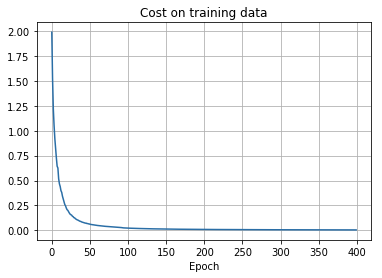

In [160]:
import importlib
importlib.reload(visual)
f = open("json/overfitting1.json", 'r')
training_cost, training_accuracy, test_cost, test_accuracy = json.load(f)
f.close()
visual.plot_training_cost(training_cost)
visual.save_imgae("../image/overfitting_noreg_1000_cost_0.jpg", plt)

那么究竟学习的效果是否与期望的一样完美呢？我们将测试集的准确率变化曲线图绘制如下。为了便于观察，我将$x$轴起始的位置设置为$\text{Epoch}=100$，而不是从$0$开始。根据变化曲线图可以明显的看到测试集的准确率在快速的上升到$84.1\%$之后，上升的速度变的非常缓慢，甚至有所下降。观察代价函数的曲线，发现我们的网络学习的效果一直在变“好”，但是观察准确率曲线，却发现一切都是假象。大约在$\text{Epoch}=220$之后的学习并没有提高网络的泛化能力，导致无法提高在测试集上的准确率。我们将这个现象称之为过拟合或过度训练。

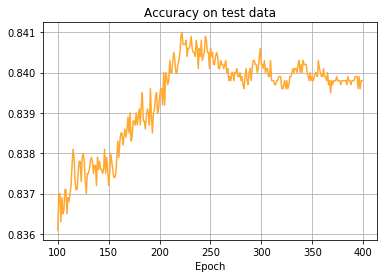

In [161]:
visual.plot_test_accuracy(test_accuracy, xmin=100)
visual.save_imgae("../image/overfitting_noreg_1000_acc_1.jpg", plt)
plt.show()

## 过拟合的迹象
这一节我们将介绍网络训练时会出现的四个迹象，这些迹象可以帮助我们判断网络是否过拟合。前面一节中已经提到了其中一个迹象：当测试集的准确率一直在某个很小的区间浮动，不再提升时，我们就可以判断网络可能出现过拟合。

接下来我们根据上一节的训练结果，将训练集和测试集成本函数变化曲线对比图绘制如下。观察变化曲线图可以发现测试集成本下降了一段之后（大约在$\text{Epoch}=13$处)开始上升，然而训练集的代价函数一直在下降。这是第二个迹象，据此我们可以判断网络可能出现了过拟合。

同时，观察图像我们还可以发现训练集代价函数曲线与测试集代价函数曲线之前的间距很大，这表明测试集误差要远远大于训练集误差。具体来说，训练集代价函数可以最小化到约$0.004$，而测试集代价函数只能最小化到$1.11$，约是训练集误差的$228$倍。这是网络出现过拟合的第三个迹象。

The minimum cost on the training data: 0.003870424841933993
The minimum cost on the test data: 1.1084992397610995


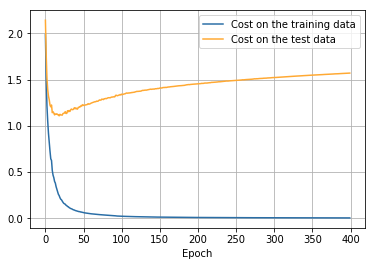

In [162]:
visual.plot_training_evaluation_cost(training_cost, test_cost)
visual.save_imgae("../image/overfitting_noreg_1000_cost_mixed.jpg", plt)
print("""The minimum cost on the training data: {}
The minimum cost on the test data: {}""".format(
    np.min(training_cost), np.min(test_cost)))

第四个迹象我们可以通过绘制训练集和测试集的准确率曲线得到。为了便于观察，我对$x$轴进行了放缩。观察变化曲线图可以发现当$\text{Epoch}=100$时，测试集的准确率已经到达了$100\%$，之后无法再提升。这表明网络已经可以完全正确的识别训练集中的1000张图片。但是与此同时，测试集的准确率却只有$84.1\%$，并且两条曲线之前间距很大，也就意味着训练集准确率一直比测试集准确率高很多。这表明网络只是识别了训练集中的1000张图片，但是泛化能力很弱，在训练集之外的图片就无法很好的进行识别。据此，我们可以判断网络可能出现了过拟合。

The final accuracy on the training data: 1.0
The final accuracy on the test data: 0.841


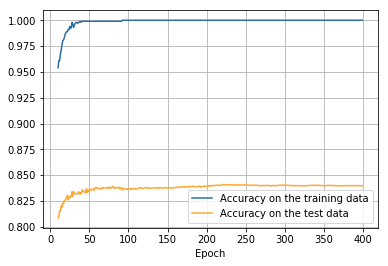

In [163]:
visual.plot_training_evaluation_accuracy(training_accuracy, test_accuracy, xmin=10)
visual.save_imgae("../image/overfitting_noreg_1000_acc_mixed.jpg", plt)
print("""The final accuracy on the training data: {}
The final accuracy on the test data: {}""".format(
    np.max(training_accuracy), np.max(test_accuracy)))

## L2正则化方法
这一节介绍如何将L2正则化方法应用于识别MNIST数据集。

### 公式说明
L2正则的思想就是在代价函数之后加一个正则项，假设未正则化的代价函数为$C_0$，则经过L2正则化的代价函数为：

$$
C = C_0 + \frac{\lambda}{2n}\sum_w w^2
$$

其中，$\lambda$是正则化参数，用于控制正则化的程度，$n$表示训练集的大小。对于所有的代价函数，上式都适用。以交叉熵代价函数为例，新的代价函数形式如下：

$$
C = -\frac{1}{n} \sum_x \sum_j \left(y_j\ln a_j + (1-y_j)\ln (1-a_j)\right) + \frac{\lambda}{2n}\sum_w w^2
$$

由于代价函数发生了变化，因此我们需要重新计算$\frac{\partial C}{\partial w}$和$\frac{\partial C}{\partial b}$。计算结果如下：

$$
\begin{eqnarray}
\frac{\partial C}{\partial w} &=& \frac{\partial C_0}{\partial w} + \frac{\lambda}{n}w \\
\frac{\partial C}{\partial b} &=& \frac{\partial C_0}{\partial b}
\end{eqnarray}
$$

在梯度更新时也需要进行相应的修改：

$$
\begin{eqnarray}
w &=& w - \alpha\frac{\partial C_0}{\partial w} - \frac{\alpha\lambda}{n}w = \left(1-\frac{\alpha\lambda}{n}\right)w - \alpha\frac{\partial C_0}{\partial w}\\
b &=& b - \alpha\frac{\partial C_0}{\partial b} 
\end{eqnarray}
$$

由于$\alpha>0$，$\lambda>0$，$n>0$，因此$1-\frac{\alpha\lambda}{n}<1$。据此可知在梯度更新时，L2正则化通过让权值与$1-\frac{\alpha\lambda}{n}$相乘使权值变小，因此L2正则化也被称为权值衰减。

有了上述这些公式后，我们就可以开始实现L2正则化方法了。

### 实现
我们使用交叉熵代价函数的代码，在其基础上实现L2正则化方法。

- 代价函数中加入正则项

主要修改了代码的第11-12行，在原代价函数的基础上加上了正则项的计算结果。

In [ ]:
def total_cost(self, data, lmbda, convert=False):
    """
    根据不同的代价函数计算总损失
    """
    cost = 0.0
    for (x, y) in data:
        a = self.cost.predict(x, self.weights, self.biases)
        if convert:
            y = vectorized_result(y)
        cost += self.cost.fn(a, y) / len(data)
    cost += 0.5 * (lmbda / len(data)) * sum(
        np.linalg.norm(w)**2 for w in self.weights)

    return cost

- 梯度更新

修改了第12-15行，更新权值时在初始$w$前乘了系数$1-\frac{\alpha\lambda}{n}$。

In [ ]:
def update_mini_batch(self, mini_batch, alpha, lmbda, n):
    '''
    1. 通过BP算法得到损失函数对w,b的梯度
    2. 更新weights和biases
    '''
    nabla_w = [np.zeros(w.shape) for w in self.weights]
    nabla_b = [np.zeros(b.shape) for b in self.biases]
    for x, y in mini_batch:
        delta_nabla_w, delta_nabla_b = self.backword_prop(x, y)
        nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
    self.weights = [
        (1 - alpha * lmbda / n) * w - alpha / len(mini_batch) * nw
        for w, nw in zip(self.weights, nabla_w)
    ]
    self.biases = [
        b - alpha / len(mini_batch) * nb
        for b, nb in zip(self.biases, nabla_b)
    ]

### 结果展示

接下来进入实战环节，我们使用改进后的神经网络对MNIST数据集进行训练。参数设置如旧，使用3层神经网络，其中隐藏层神经元$\text{hidden_layer_neurals=30}$，学习率$\alpha=0.5$，$\text{mini_batch_size}=10$，$\text{Epoches}=400$，正则化参数$\lambda=0.1$。

In [128]:
%%time
random.seed(42)
np.random.seed(42)
net = network.Network([784, 30, 10], cost = network.CrossEntropyCost)
training_cost, training_accuracy, evaluation_cost, evaluation_accuracy = \
net.SGD(training_data[:1000], 400, 10, 0.5, 
        evaluation_data=test_data,
        lmbda=0.1,
        monitor_evaluation_cost=True,
        monitor_evaluation_accuracy = True,
        monitor_training_cost=True,
        monitor_training_accuracy = True)

f = open("json/overfitting2.json", 'w')
json.dump([training_cost, training_accuracy, evaluation_cost, evaluation_accuracy], f)
f.close()

Epoch 0 training complete
Cost on training data: 3.1690427095365075
Accuracy on training data: 0.618
Cost on evaluation data: 2.2600705223834994
Accuracy on evaluation data: 0.5609
Epoch 1 training complete
Cost on training data: 2.69475511526098
Accuracy on training data: 0.725
Cost on evaluation data: 1.8868955091442605
Accuracy on evaluation data: 0.6533
Epoch 2 training complete
Cost on training data: 2.3782647666086167
Accuracy on training data: 0.832
Cost on evaluation data: 1.6284236131442018
Accuracy on evaluation data: 0.7315
Epoch 3 training complete
Cost on training data: 2.2018855900766123
Accuracy on training data: 0.87
Cost on evaluation data: 1.5039604968952722
Accuracy on evaluation data: 0.7583
Epoch 4 training complete
Cost on training data: 2.062504052210175
Accuracy on training data: 0.881
Cost on evaluation data: 1.427536401077954
Accuracy on evaluation data: 0.7701
Epoch 5 training complete
Cost on training data: 1.9542885802044654
Accuracy on training data: 0.895

Accuracy on training data: 0.999
Cost on evaluation data: 1.1544913607079241
Accuracy on evaluation data: 0.8419
Epoch 46 training complete
Cost on training data: 0.8882378263855376
Accuracy on training data: 0.999
Cost on evaluation data: 1.1456404230750301
Accuracy on evaluation data: 0.8467
Epoch 47 training complete
Cost on training data: 0.8812429629697565
Accuracy on training data: 0.999
Cost on evaluation data: 1.1577091449719055
Accuracy on evaluation data: 0.8422
Epoch 48 training complete
Cost on training data: 0.8714162852236336
Accuracy on training data: 0.999
Cost on evaluation data: 1.1501436916957508
Accuracy on evaluation data: 0.8443
Epoch 49 training complete
Cost on training data: 0.8642185428205772
Accuracy on training data: 0.999
Cost on evaluation data: 1.1600667287406627
Accuracy on evaluation data: 0.8425
Epoch 50 training complete
Cost on training data: 0.853921173722916
Accuracy on training data: 0.999
Cost on evaluation data: 1.1397162805839438
Accuracy on ev

Cost on training data: 0.5914331928403304
Accuracy on training data: 1.0
Cost on evaluation data: 1.0668790207067629
Accuracy on evaluation data: 0.8561
Epoch 92 training complete
Cost on training data: 0.5865238080759886
Accuracy on training data: 1.0
Cost on evaluation data: 1.0812234939251986
Accuracy on evaluation data: 0.8529
Epoch 93 training complete
Cost on training data: 0.5816305204083702
Accuracy on training data: 1.0
Cost on evaluation data: 1.080216581649989
Accuracy on evaluation data: 0.8535
Epoch 94 training complete
Cost on training data: 0.576798510737788
Accuracy on training data: 1.0
Cost on evaluation data: 1.0652249148902257
Accuracy on evaluation data: 0.856
Epoch 95 training complete
Cost on training data: 0.5720306264141413
Accuracy on training data: 1.0
Cost on evaluation data: 1.0665886934624598
Accuracy on evaluation data: 0.8555
Epoch 96 training complete
Cost on training data: 0.5674015897637242
Accuracy on training data: 1.0
Cost on evaluation data: 1.063

Cost on evaluation data: 0.998659899106047
Accuracy on evaluation data: 0.86
Epoch 137 training complete
Cost on training data: 0.4097369425357385
Accuracy on training data: 1.0
Cost on evaluation data: 1.0003438989998858
Accuracy on evaluation data: 0.8613
Epoch 138 training complete
Cost on training data: 0.4065035453072464
Accuracy on training data: 1.0
Cost on evaluation data: 0.9976841601172323
Accuracy on evaluation data: 0.8615
Epoch 139 training complete
Cost on training data: 0.4032895440198249
Accuracy on training data: 1.0
Cost on evaluation data: 0.9947312680848356
Accuracy on evaluation data: 0.8615
Epoch 140 training complete
Cost on training data: 0.40049842782513395
Accuracy on training data: 1.0
Cost on evaluation data: 0.9905311216389232
Accuracy on evaluation data: 0.8613
Epoch 141 training complete
Cost on training data: 0.3980663653780854
Accuracy on training data: 1.0
Cost on evaluation data: 0.9913864842189487
Accuracy on evaluation data: 0.861
Epoch 142 training

Cost on evaluation data: 0.927634505708497
Accuracy on evaluation data: 0.8689
Epoch 183 training complete
Cost on training data: 0.2950049695215451
Accuracy on training data: 1.0
Cost on evaluation data: 0.9255055774318567
Accuracy on evaluation data: 0.8683
Epoch 184 training complete
Cost on training data: 0.29305704947041383
Accuracy on training data: 1.0
Cost on evaluation data: 0.9315592195295882
Accuracy on evaluation data: 0.8684
Epoch 185 training complete
Cost on training data: 0.29114523000199793
Accuracy on training data: 1.0
Cost on evaluation data: 0.9315890393825716
Accuracy on evaluation data: 0.8687
Epoch 186 training complete
Cost on training data: 0.289364890162671
Accuracy on training data: 1.0
Cost on evaluation data: 0.9308002555243625
Accuracy on evaluation data: 0.8685
Epoch 187 training complete
Cost on training data: 0.2874750887185867
Accuracy on training data: 1.0
Cost on evaluation data: 0.9297193294019207
Accuracy on evaluation data: 0.866
Epoch 188 traini

Accuracy on evaluation data: 0.8742
Epoch 228 training complete
Cost on training data: 0.22348587547643572
Accuracy on training data: 1.0
Cost on evaluation data: 0.8733588352675068
Accuracy on evaluation data: 0.8742
Epoch 229 training complete
Cost on training data: 0.22226263515723133
Accuracy on training data: 1.0
Cost on evaluation data: 0.866319703562253
Accuracy on evaluation data: 0.875
Epoch 230 training complete
Cost on training data: 0.2211520020152588
Accuracy on training data: 1.0
Cost on evaluation data: 0.8660988762082613
Accuracy on evaluation data: 0.8748
Epoch 231 training complete
Cost on training data: 0.21981065840531114
Accuracy on training data: 1.0
Cost on evaluation data: 0.8687370047630265
Accuracy on evaluation data: 0.8734
Epoch 232 training complete
Cost on training data: 0.2186961267597618
Accuracy on training data: 1.0
Cost on evaluation data: 0.8707142744120994
Accuracy on evaluation data: 0.8748
Epoch 233 training complete
Cost on training data: 0.21735

Cost on training data: 0.17763837844926292
Accuracy on training data: 1.0
Cost on evaluation data: 0.8403660274895925
Accuracy on evaluation data: 0.8784
Epoch 274 training complete
Cost on training data: 0.17682009805877588
Accuracy on training data: 1.0
Cost on evaluation data: 0.8340002414207857
Accuracy on evaluation data: 0.8791
Epoch 275 training complete
Cost on training data: 0.17609616051808824
Accuracy on training data: 1.0
Cost on evaluation data: 0.8360803376289461
Accuracy on evaluation data: 0.8782
Epoch 276 training complete
Cost on training data: 0.1753943535813599
Accuracy on training data: 1.0
Cost on evaluation data: 0.8297037446911997
Accuracy on evaluation data: 0.8792
Epoch 277 training complete
Cost on training data: 0.17429196173775016
Accuracy on training data: 1.0
Cost on evaluation data: 0.8328922485204184
Accuracy on evaluation data: 0.879
Epoch 278 training complete
Cost on training data: 0.173765562805289
Accuracy on training data: 1.0
Cost on evaluation d

Accuracy on training data: 1.0
Cost on evaluation data: 0.8164777349958483
Accuracy on evaluation data: 0.8823
Epoch 319 training complete
Cost on training data: 0.14734842448141097
Accuracy on training data: 1.0
Cost on evaluation data: 0.8132380427012523
Accuracy on evaluation data: 0.8821
Epoch 320 training complete
Cost on training data: 0.14684662470429505
Accuracy on training data: 1.0
Cost on evaluation data: 0.8132083165713145
Accuracy on evaluation data: 0.8825
Epoch 321 training complete
Cost on training data: 0.1461954781035842
Accuracy on training data: 1.0
Cost on evaluation data: 0.814914440051452
Accuracy on evaluation data: 0.8823
Epoch 322 training complete
Cost on training data: 0.14583326843441252
Accuracy on training data: 1.0
Cost on evaluation data: 0.8059191193040879
Accuracy on evaluation data: 0.8837
Epoch 323 training complete
Cost on training data: 0.14546577809392164
Accuracy on training data: 1.0
Cost on evaluation data: 0.8112560910159987
Accuracy on evalu

Cost on evaluation data: 0.8032220294932205
Accuracy on evaluation data: 0.8843
Epoch 364 training complete
Cost on training data: 0.12784670352818947
Accuracy on training data: 1.0
Cost on evaluation data: 0.7947114430844101
Accuracy on evaluation data: 0.8854
Epoch 365 training complete
Cost on training data: 0.12755545442097097
Accuracy on training data: 1.0
Cost on evaluation data: 0.7964654950928951
Accuracy on evaluation data: 0.8847
Epoch 366 training complete
Cost on training data: 0.12752315961400423
Accuracy on training data: 1.0
Cost on evaluation data: 0.8042456978070752
Accuracy on evaluation data: 0.8839
Epoch 367 training complete
Cost on training data: 0.1272197301356959
Accuracy on training data: 1.0
Cost on evaluation data: 0.7984065164510337
Accuracy on evaluation data: 0.8845
Epoch 368 training complete
Cost on training data: 0.12642330676376295
Accuracy on training data: 1.0
Cost on evaluation data: 0.8104809991730612
Accuracy on evaluation data: 0.8826
Epoch 369 t

训练完成后，我们首先绘制代价函数随$\text{Epoch}$变化曲线图，根据图中的曲线可知代价函数持续下降，与我们的预期相符。

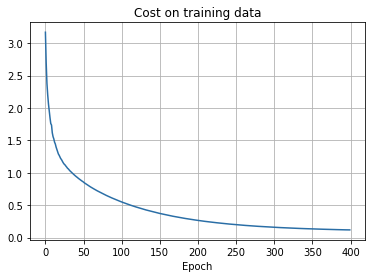

In [164]:
f = open("json/overfitting2.json", 'r')
training_cost, training_accuracy, test_cost, test_accuracy = json.load(f)
f.close()
visual.plot_training_cost(training_cost)
visual.save_imgae("../image/overfitting_l2_1000_cost_0.jpg", plt)

绘制测试集准确率随$\text{Epoch}$变化的曲线图。可以发现测试集的准确率在$\text{Epoch}\in[0, 350]$稳定上升，并且最终的准确率达到了$88.58\%$，而不使用正则化时的准确率只有$84.1\%$。由此可见L2正则化方法的确帮助我们提高了网络的泛化能力，提高了模型的准确率，减小了过拟合带来的影响。

The final accuracy on the test data: 0.8858


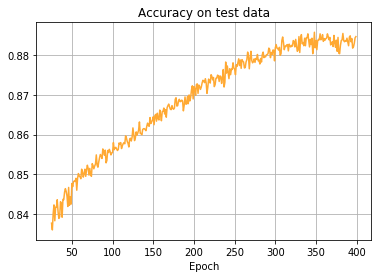

In [165]:
visual.plot_test_accuracy(test_accuracy, xmin=25, epoches=400)
visual.save_imgae("../image/overfitting_l2_1000_acc_1.jpg", plt)
print("The final accuracy on the test data: {}".format(
    np.max(test_accuracy)))

最后我们尝试将所有的测试集都用于训练，并将隐藏层神经元个数设置为100，观察使用L2正则化方法能够将网络训练到什么程度。此时需要注意一点：由于训练集从1000增加到了60000，会对因数$1-\frac{\alpha\lambda}{n}$产生影响，因此正则化参数$\lambda$也要随之从$0.1$增大到$6$。

In [138]:
%%time
random.seed(42)
np.random.seed(42)
net = network.Network([784, 100, 10], cost = network.CrossEntropyCost)
training_cost, training_accuracy, evaluation_cost, evaluation_accuracy = \
net.SGD(training_data, 400, 10, 0.5, 
        evaluation_data=test_data,
        lmbda=6,
        monitor_evaluation_cost=True,
        monitor_evaluation_accuracy = True,
        monitor_training_cost=True,
        monitor_training_accuracy = True)

f = open("json/overfitting3.json", 'w')
json.dump([training_cost, training_accuracy, evaluation_cost, evaluation_accuracy], f)
f.close()

Epoch 0 training complete
Cost on training data: 2.6467988385031536
Accuracy on training data: 0.9409
Cost on evaluation data: 13.798512249058108
Accuracy on evaluation data: 0.9364
Epoch 1 training complete
Cost on training data: 1.5484193144570932
Accuracy on training data: 0.9613333333333334
Cost on evaluation data: 7.909945204491271
Accuracy on evaluation data: 0.9554
Epoch 2 training complete
Cost on training data: 0.9832895272540405
Accuracy on training data: 0.9689166666666666
Cost on evaluation data: 4.756587863900699
Accuracy on evaluation data: 0.9612
Epoch 3 training complete
Cost on training data: 0.6655732126913959
Accuracy on training data: 0.9742833333333333
Cost on evaluation data: 3.0382050294943372
Accuracy on evaluation data: 0.9661
Epoch 4 training complete
Cost on training data: 0.5177475037255845
Accuracy on training data: 0.97435
Cost on evaluation data: 2.1435082200573867
Accuracy on evaluation data: 0.9656
Epoch 5 training complete
Cost on training data: 0.4076

Epoch 43 training complete
Cost on training data: 0.25403453238964363
Accuracy on training data: 0.9879166666666667
Cost on evaluation data: 1.015561284241596
Accuracy on evaluation data: 0.9774
Epoch 44 training complete
Cost on training data: 0.2745257655138725
Accuracy on training data: 0.98545
Cost on evaluation data: 1.039165525917088
Accuracy on evaluation data: 0.9738
Epoch 45 training complete
Cost on training data: 0.2684506144715212
Accuracy on training data: 0.9858666666666667
Cost on evaluation data: 1.029031989650152
Accuracy on evaluation data: 0.975
Epoch 46 training complete
Cost on training data: 0.27261872712566837
Accuracy on training data: 0.9855833333333334
Cost on evaluation data: 1.0331524801669045
Accuracy on evaluation data: 0.9764
Epoch 47 training complete
Cost on training data: 0.2682001909722127
Accuracy on training data: 0.98645
Cost on evaluation data: 1.0241240377680052
Accuracy on evaluation data: 0.9762
Epoch 48 training complete
Cost on training data:

Cost on training data: 0.25386320045633454
Accuracy on training data: 0.9883666666666666
Cost on evaluation data: 1.0148921179998303
Accuracy on evaluation data: 0.9773
Epoch 87 training complete
Cost on training data: 0.2578173238676667
Accuracy on training data: 0.9873666666666666
Cost on evaluation data: 1.0151265706587527
Accuracy on evaluation data: 0.9772
Epoch 88 training complete
Cost on training data: 0.2605459713122808
Accuracy on training data: 0.9862333333333333
Cost on evaluation data: 1.0231932057210298
Accuracy on evaluation data: 0.9768
Epoch 89 training complete
Cost on training data: 0.25258778941924653
Accuracy on training data: 0.9880833333333333
Cost on evaluation data: 1.0175068760741743
Accuracy on evaluation data: 0.977
Epoch 90 training complete
Cost on training data: 0.2662346252346002
Accuracy on training data: 0.98695
Cost on evaluation data: 1.0283792273841321
Accuracy on evaluation data: 0.9743
Epoch 91 training complete
Cost on training data: 0.2458551470

Cost on evaluation data: 1.0156178737558839
Accuracy on evaluation data: 0.9766
Epoch 129 training complete
Cost on training data: 0.24954271069408163
Accuracy on training data: 0.9894333333333334
Cost on evaluation data: 1.0135598096685048
Accuracy on evaluation data: 0.9782
Epoch 130 training complete
Cost on training data: 0.2850255497321029
Accuracy on training data: 0.9841166666666666
Cost on evaluation data: 1.0426728277061819
Accuracy on evaluation data: 0.973
Epoch 131 training complete
Cost on training data: 0.2543270944099974
Accuracy on training data: 0.9878166666666667
Cost on evaluation data: 1.0145091536157007
Accuracy on evaluation data: 0.9776
Epoch 132 training complete
Cost on training data: 0.2555615433772127
Accuracy on training data: 0.98805
Cost on evaluation data: 1.0132060566859271
Accuracy on evaluation data: 0.977
Epoch 133 training complete
Cost on training data: 0.26304769905639447
Accuracy on training data: 0.9865
Cost on evaluation data: 1.0176388121977278

Accuracy on training data: 0.9874333333333334
Cost on evaluation data: 1.0264289871325962
Accuracy on evaluation data: 0.9779
Epoch 172 training complete
Cost on training data: 0.24854631259015075
Accuracy on training data: 0.9890333333333333
Cost on evaluation data: 1.0058034708649632
Accuracy on evaluation data: 0.9789
Epoch 173 training complete
Cost on training data: 0.27829613381580376
Accuracy on training data: 0.98435
Cost on evaluation data: 1.0409725497873727
Accuracy on evaluation data: 0.9736
Epoch 174 training complete
Cost on training data: 0.25600821966196624
Accuracy on training data: 0.9876666666666667
Cost on evaluation data: 1.0155333117376668
Accuracy on evaluation data: 0.9768
Epoch 175 training complete
Cost on training data: 0.2504333064190812
Accuracy on training data: 0.9885666666666667
Cost on evaluation data: 1.0055590929053433
Accuracy on evaluation data: 0.9783
Epoch 176 training complete
Cost on training data: 0.2788424814012441
Accuracy on training data: 0

Epoch 214 training complete
Cost on training data: 0.262855158053636
Accuracy on training data: 0.9875
Cost on evaluation data: 1.0187857821682718
Accuracy on evaluation data: 0.9766
Epoch 215 training complete
Cost on training data: 0.26328870962920403
Accuracy on training data: 0.9860166666666667
Cost on evaluation data: 1.0268606447753603
Accuracy on evaluation data: 0.975
Epoch 216 training complete
Cost on training data: 0.2833172622026618
Accuracy on training data: 0.9840666666666666
Cost on evaluation data: 1.0356856085293191
Accuracy on evaluation data: 0.9737
Epoch 217 training complete
Cost on training data: 0.32013233817246345
Accuracy on training data: 0.9794166666666667
Cost on evaluation data: 1.073356705910985
Accuracy on evaluation data: 0.968
Epoch 218 training complete
Cost on training data: 0.26172459789192004
Accuracy on training data: 0.9865
Cost on evaluation data: 1.0200707439484378
Accuracy on evaluation data: 0.975
Epoch 219 training complete
Cost on training d

Cost on evaluation data: 1.0390031624484197
Accuracy on evaluation data: 0.9753
Epoch 257 training complete
Cost on training data: 0.2481588087618236
Accuracy on training data: 0.9885833333333334
Cost on evaluation data: 0.9993187639623465
Accuracy on evaluation data: 0.9785
Epoch 258 training complete
Cost on training data: 0.2922828467990095
Accuracy on training data: 0.9844833333333334
Cost on evaluation data: 1.043829703174521
Accuracy on evaluation data: 0.9734
Epoch 259 training complete
Cost on training data: 0.26018715781099966
Accuracy on training data: 0.9866
Cost on evaluation data: 1.0158813944044414
Accuracy on evaluation data: 0.9769
Epoch 260 training complete
Cost on training data: 0.25958559514097523
Accuracy on training data: 0.9879333333333333
Cost on evaluation data: 1.0160167478326727
Accuracy on evaluation data: 0.9772
Epoch 261 training complete
Cost on training data: 0.2428650472397917
Accuracy on training data: 0.9898
Cost on evaluation data: 1.0016975707210167

Accuracy on training data: 0.9887
Cost on evaluation data: 0.9944391963717689
Accuracy on evaluation data: 0.9789
Epoch 300 training complete
Cost on training data: 0.24489588958638392
Accuracy on training data: 0.989
Cost on evaluation data: 0.9986652247786381
Accuracy on evaluation data: 0.9797
Epoch 301 training complete
Cost on training data: 0.26480137154275313
Accuracy on training data: 0.9866166666666667
Cost on evaluation data: 1.0206170738445421
Accuracy on evaluation data: 0.9756
Epoch 302 training complete
Cost on training data: 0.279384179940378
Accuracy on training data: 0.9840833333333333
Cost on evaluation data: 1.0372005592497635
Accuracy on evaluation data: 0.9731
Epoch 303 training complete
Cost on training data: 0.2481596866111611
Accuracy on training data: 0.9886666666666667
Cost on evaluation data: 1.0058399558212403
Accuracy on evaluation data: 0.9775
Epoch 304 training complete
Cost on training data: 0.2558393066180287
Accuracy on training data: 0.987366666666666

Accuracy on evaluation data: 0.9765
Epoch 342 training complete
Cost on training data: 0.2717630016670465
Accuracy on training data: 0.98595
Cost on evaluation data: 1.0170589578132334
Accuracy on evaluation data: 0.9776
Epoch 343 training complete
Cost on training data: 0.25702599813739524
Accuracy on training data: 0.9876166666666667
Cost on evaluation data: 1.0149948171345442
Accuracy on evaluation data: 0.9754
Epoch 344 training complete
Cost on training data: 0.26169678182063183
Accuracy on training data: 0.98695
Cost on evaluation data: 1.0186975550714972
Accuracy on evaluation data: 0.9765
Epoch 345 training complete
Cost on training data: 0.2880326644603426
Accuracy on training data: 0.9840166666666667
Cost on evaluation data: 1.041603746062572
Accuracy on evaluation data: 0.9724
Epoch 346 training complete
Cost on training data: 0.24555926830216102
Accuracy on training data: 0.9887333333333334
Cost on evaluation data: 0.9999465194074246
Accuracy on evaluation data: 0.9787
Epoc

Cost on evaluation data: 1.0255949124651154
Accuracy on evaluation data: 0.9755
Epoch 385 training complete
Cost on training data: 0.24956214973729307
Accuracy on training data: 0.9885833333333334
Cost on evaluation data: 1.0061289356425882
Accuracy on evaluation data: 0.9768
Epoch 386 training complete
Cost on training data: 0.263288512202971
Accuracy on training data: 0.9857333333333334
Cost on evaluation data: 1.0170848132760677
Accuracy on evaluation data: 0.9755
Epoch 387 training complete
Cost on training data: 0.2504038232622534
Accuracy on training data: 0.98905
Cost on evaluation data: 1.0078909259692843
Accuracy on evaluation data: 0.9784
Epoch 388 training complete
Cost on training data: 0.244206304437051
Accuracy on training data: 0.9887666666666667
Cost on evaluation data: 1.004004969853186
Accuracy on evaluation data: 0.9779
Epoch 389 training complete
Cost on training data: 0.2698403797999441
Accuracy on training data: 0.98535
Cost on evaluation data: 1.018066386578507
A

绘制训练集和测试集准确率曲线图，可以发现两条曲线十分接近，训练集的准确率达到了约$98.98\%$，测试集的准确率达到了$98.1\%$，突破了$98\%$。对于一个简单的三层神经网络来说，能够达到这个准确率已不算差。

The final accuracy on the training data: 0.9898333333333333
The final accuracy on the test data: 0.981


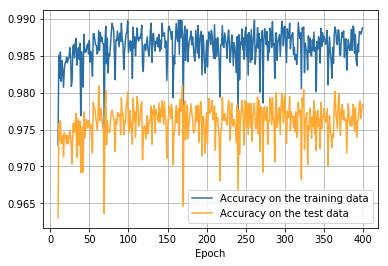

In [159]:
f = open("json/overfitting3.json", 'r')
training_cost, training_accuracy, test_cost, test_accuracy = json.load(f)
f.close()
visual.plot_training_evaluation_accuracy(training_accuracy, test_accuracy, xmin=10)
visual.save_imgae("../image/overfitting_l2_60000_acc_mixed.jpg", plt)
print("""The final accuracy on the training data: {}
The final accuracy on the test data: {}""".format(
    np.max(training_accuracy), np.max(test_accuracy)))